In [18]:
%load_ext autoreload
%autoreload 2

import os
import os.path as osp
import sys

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wandb

sys.path.append("../src")

from plot_utils import process_results, execute_df_rollout, execute_plot, find_max_train_save

api = wandb.Api(
    overrides={"entity": "kobybibas", "project": "pnml_for_active_learning"}
)
out_dir = "../outputs/analysis"
os.makedirs(out_dir, exist_ok=True)

# Project is specified by
runs = api.runs("kobybibas/pnml_for_active_learning")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
! wandb login

wandb: Currently logged in as: kobybibas. Use `wandb login --relogin` to force relogin


In [20]:
random_runs = [
    "kobybibas/pnml_for_active_learning/1bbglago",
    "kobybibas/pnml_for_active_learning/19zgsvsq",
    "kobybibas/pnml_for_active_learning/37bpimwr",
    "kobybibas/pnml_for_active_learning/20zs9ve3",
    "kobybibas/pnml_for_active_learning/3kolqa1l",
    "kobybibas/pnml_for_active_learning/3stvad2p",
]
bald_runs = [
    "kobybibas/pnml_for_active_learning/2otgvdyj",
    "kobybibas/pnml_for_active_learning/2k88fmjo",
    "kobybibas/pnml_for_active_learning/iuuz9h6u",
    "kobybibas/pnml_for_active_learning/1iqh7t2a",
    "kobybibas/pnml_for_active_learning/4xon31lm",
    "kobybibas/pnml_for_active_learning/1jzdee7h",
]

kmean_runs = [
    "kobybibas/pnml_for_active_learning/1pk3aax4",
    "kobybibas/pnml_for_active_learning/3ijl98k8",
    "kobybibas/pnml_for_active_learning/y9k8w8w7",
    "kobybibas/pnml_for_active_learning/1vhbbr7a",
    "kobybibas/pnml_for_active_learning/1o0h3of7",
]

pnml_runs = [
    "kobybibas/pnml_for_active_learning/30d9gtz6",
    "kobybibas/pnml_for_active_learning/140fffra",
    "kobybibas/pnml_for_active_learning/3lfojzff",
    "kobybibas/pnml_for_active_learning/3fktwwna",
    "kobybibas/pnml_for_active_learning/2z388i0m",
    "kobybibas/pnml_for_active_learning/1pyv0bt6",
]

random_dfs = process_results(api=api, run_list=random_runs)
bald_dfs = process_results(api=api, run_list=bald_runs)
kmean_dfs = process_results(api=api, run_list=kmean_runs)
pnml_dfs = process_results(api=api, run_list=pnml_runs)

kobybibas/pnml_for_active_learning/1bbglago
kobybibas/pnml_for_active_learning/19zgsvsq
kobybibas/pnml_for_active_learning/37bpimwr
kobybibas/pnml_for_active_learning/20zs9ve3
kobybibas/pnml_for_active_learning/3kolqa1l
kobybibas/pnml_for_active_learning/3stvad2p
kobybibas/pnml_for_active_learning/2otgvdyj
kobybibas/pnml_for_active_learning/2k88fmjo
kobybibas/pnml_for_active_learning/iuuz9h6u
kobybibas/pnml_for_active_learning/1iqh7t2a
kobybibas/pnml_for_active_learning/4xon31lm
kobybibas/pnml_for_active_learning/1jzdee7h
kobybibas/pnml_for_active_learning/1pk3aax4
kobybibas/pnml_for_active_learning/3ijl98k8
kobybibas/pnml_for_active_learning/y9k8w8w7
kobybibas/pnml_for_active_learning/1vhbbr7a
kobybibas/pnml_for_active_learning/1o0h3of7
kobybibas/pnml_for_active_learning/30d9gtz6
kobybibas/pnml_for_active_learning/140fffra
kobybibas/pnml_for_active_learning/3lfojzff
kobybibas/pnml_for_active_learning/3fktwwna
kobybibas/pnml_for_active_learning/2z388i0m
kobybibas/pnml_for_active_learni

In [21]:
rolling_size = 5
random_res = execute_df_rollout(random_dfs, rolling_size=rolling_size)
bald_res = execute_df_rollout(bald_dfs, rolling_size=rolling_size)
kmean_res = execute_df_rollout(kmean_dfs, rolling_size=rolling_size)
pnml_res = execute_df_rollout(pnml_dfs, rolling_size=rolling_size)
plot_list = [
    (random_res, "Random"),
    (bald_res, "Bald"),
    (kmean_res, "Core-set"),
    (pnml_res, "pNML"),
]

In [22]:
row = find_max_train_save(pnml_res, bald_res)
print(100 * row.training_set_size_left / row.training_set_size_right)
print(row)

training_set_size_left     3864.000000
test_acc_left                 0.684643
test_acc_round                0.685000
training_set_size_right    5688.000000
test_acc_right                0.684523
Name: 499, dtype: float64

CIFAR10


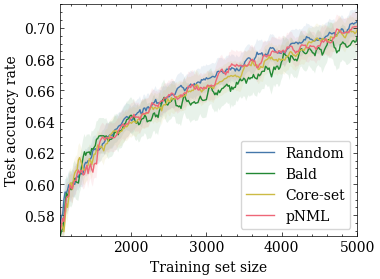

In [23]:
plt.style.use(["science", "bright", "no-latex"])
fig, ax = plt.subplots(1, 1, dpi=100, figsize=(4, 3))
fig, ax = execute_plot(plot_list, fig, ax)
ax.set_xlim(right=5000)
print("CIFAR10")
plt.tight_layout()
plt.savefig(osp.join(out_dir, "cifar10.pdf"))
plt.show()